In [111]:
# Importing Pandas
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Reading csv as dataframe
g20_index_data = pd.read_csv("UNION.csv")
g20_covid = pd.read_csv("g20_covid.csv")
g20_index_data.head()
g20_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,ARG,South America,Argentina,2020-01-01 0:00,0,0,0.0,0,0,0.0,...,27.7,0.0,5.0,76.67,0.845,45276780,0.0,0.0,0.0,0.0
1,ARG,South America,Argentina,2020-01-02 0:00,0,0,0.0,0,0,0.0,...,27.7,0.0,5.0,76.67,0.845,45276780,0.0,0.0,0.0,0.0
2,ARG,South America,Argentina,2020-01-03 0:00,0,0,0.0,0,0,0.0,...,27.7,0.0,5.0,76.67,0.845,45276780,0.0,0.0,0.0,0.0
3,ARG,South America,Argentina,2020-01-04 0:00,0,0,0.0,0,0,0.0,...,27.7,0.0,5.0,76.67,0.845,45276780,0.0,0.0,0.0,0.0
4,ARG,South America,Argentina,2020-01-05 0:00,0,0,0.0,0,0,0.0,...,27.7,0.0,5.0,76.67,0.845,45276780,0.0,0.0,0.0,0.0


In [2]:
g20_index_data['USD'] = g20_index_data['USD'].replace(0, None)

g20_index_data.isna().sum()

date          0
Country       0
USD        2198
dtype: int64

In [3]:
g20_index_data.ffill(inplace=True)

g20_index_data.head(10)

,date,Country,USD
0,2018-01-01,Argentina,NaN
1,2018-01-02,Argentina,1671.991824
2,2018-01-03,Argentina,1711.535940
3,2018-01-04,Argentina,1732.425964
4,2018-01-05,Argentina,1729.343505
5,2018-01-06,Argentina,1729.343505
6,2018-01-07,Argentina,1729.343505
7,2018-01-08,Argentina,1741.454487
8,2018-01-09,Argentina,1688.416076
9,2018-01-10,Argentina,1670.292534


In [77]:
index_2020 = g20_index_data.loc[(g20_index_data['date'] >= "2020-01-01") & (g20_index_data['date'] <= "2020-12-31")]
index_2020['date'] =  pd.to_datetime(index_2020['date'], infer_datetime_format=True)
index_2020["week"] = index_2020["date"].dt.isocalendar().week
index_2020_week =  index_2020.groupby(["Country", "week"],as_index=False).mean()

C:\Users\kanen\AppData\Local\Temp\ipykernel_9296\3937435582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_2020['date'] =  pd.to_datetime(index_2020['date'], infer_datetime_format=True)
C:\Users\kanen\AppData\Local\Temp\ipykernel_9296\3937435582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_2020["week"] = index_2020["date"].dt.isocalendar().week


##### Weekly Average of G20 Financial Markets in 2020

In [104]:
fig = px.choropleth(index_2020_week, locations='Country',locationmode = "country names", color="USD",range_color=(0, 15000), color_continuous_scale="YlGnBu", animation_frame="week")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Conclusion:** I guess it shows the volatilty in some of the G20 markets while others stayed somewhat steady. Turkey got destroyed 

##### Same Data but in Line Graph Form:

<AxesSubplot:xlabel='week', ylabel='USD'>

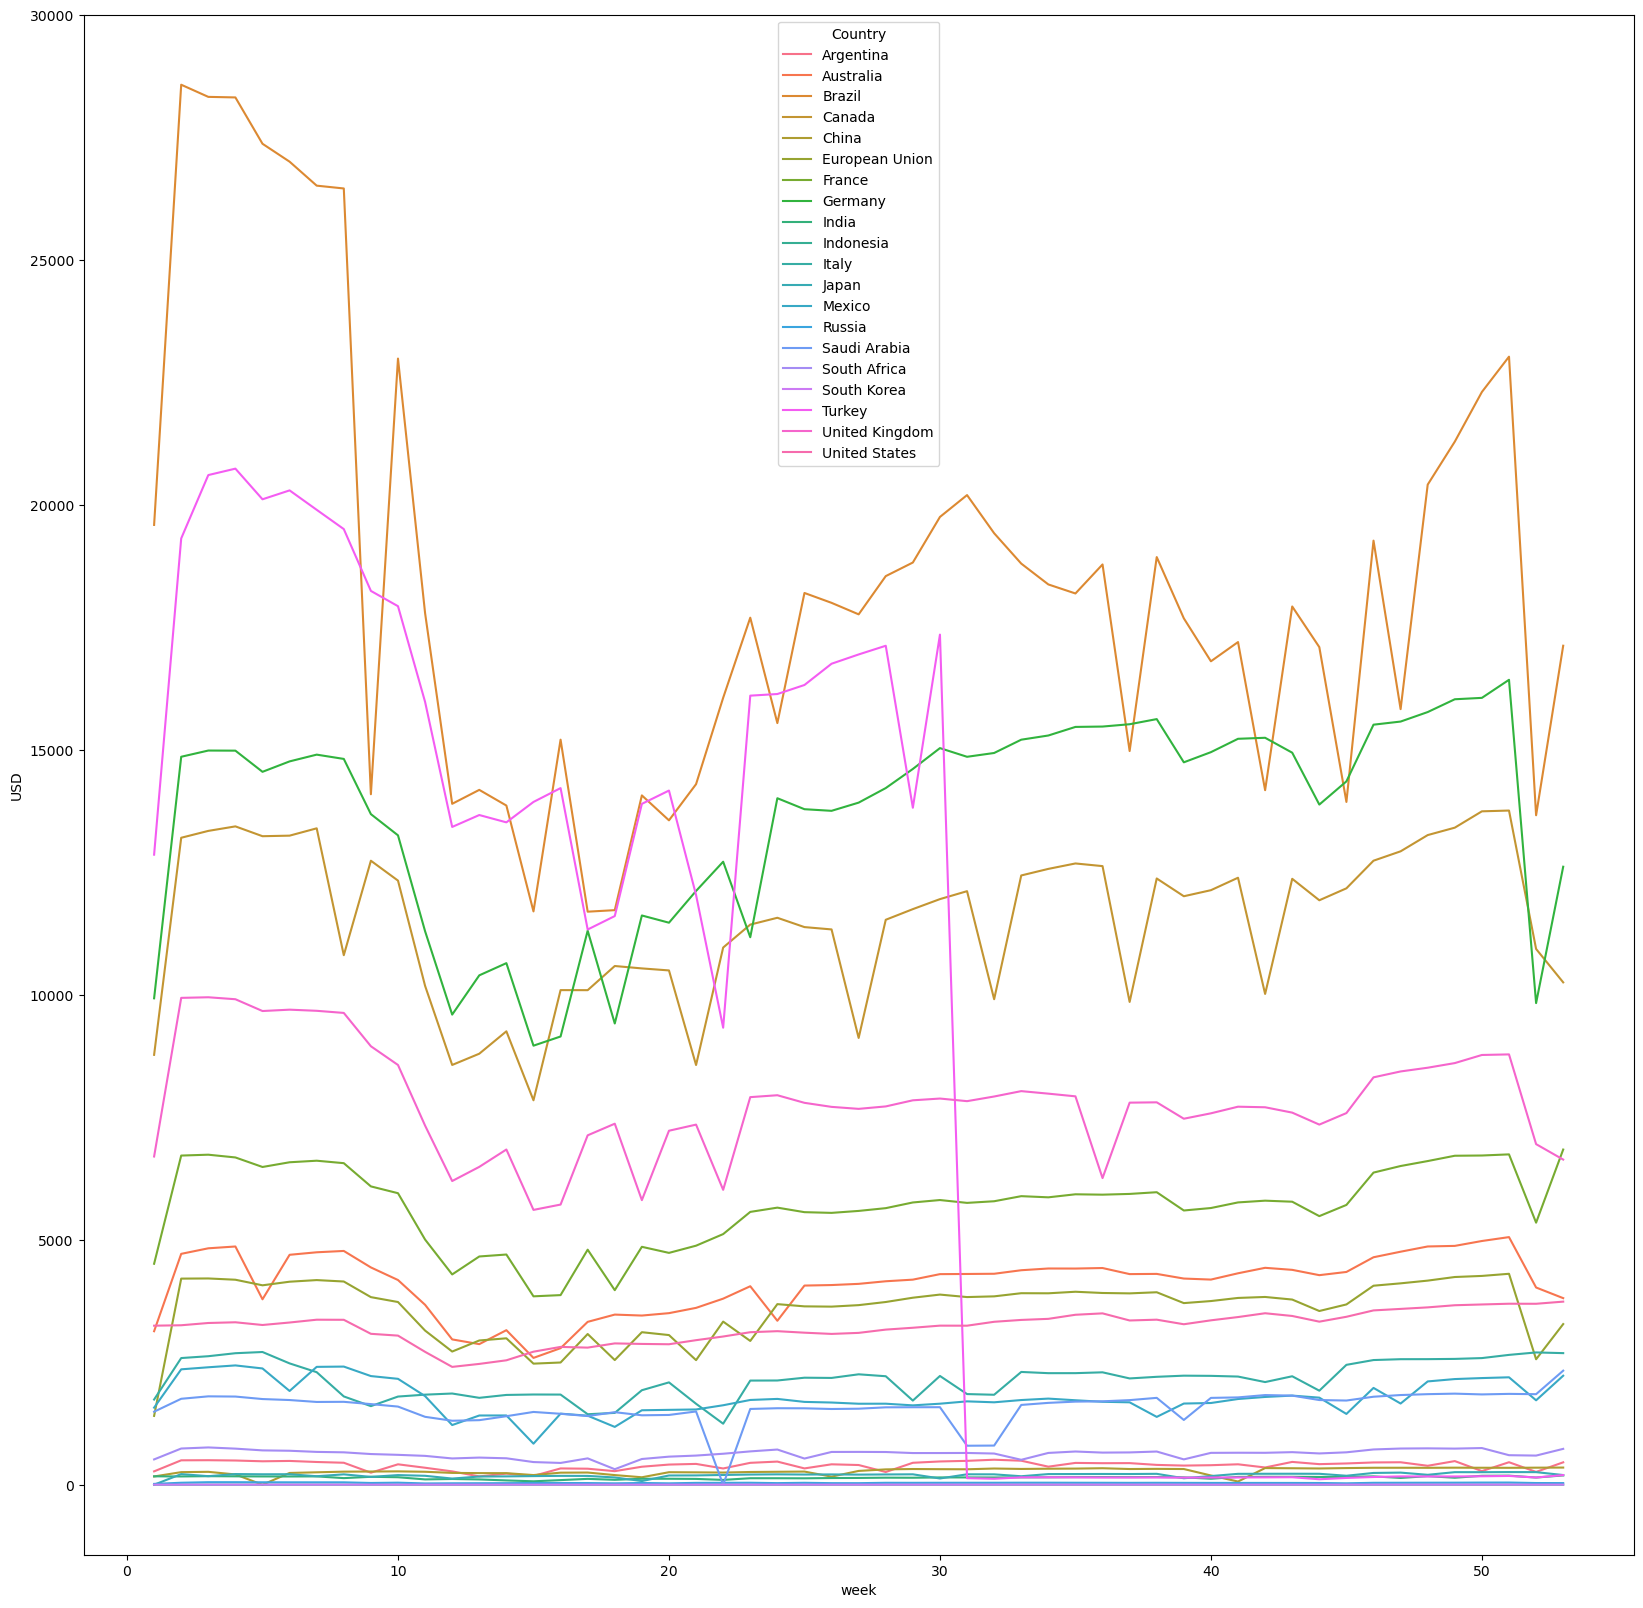

In [110]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.lineplot(x = index_2020_week["week"], y= index_2020_week["USD"], hue = index_2020_week["Country"], ci=None)